In [1]:
import pandas as pd
import numpy as np
import arrow
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('USvideos.csv')
df_10 = df[df['category_id'] == 10]

index = int(len(df_10)*0.8)
df_train =df_10[:index]
df_test = df_10[index:]

X_train = df_train[["likes"]].to_numpy()
Y_train = df_train["views"].to_numpy()
X_test = df_test[["likes"]].to_numpy()
Y_test = df_test["views"].to_numpy()

In [3]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, Y_train)

Y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(Y_test, Y_pred_xgb)
r2_xgb = r2_score(Y_test, Y_pred_xgb)

print("XGBoost - MSE: %.2f" % mse_xgb)
print("XGBoost - R2 Score: %.2f" % r2_xgb)

XGBoost - MSE: 245905413230435.53
XGBoost - R2 Score: 0.62


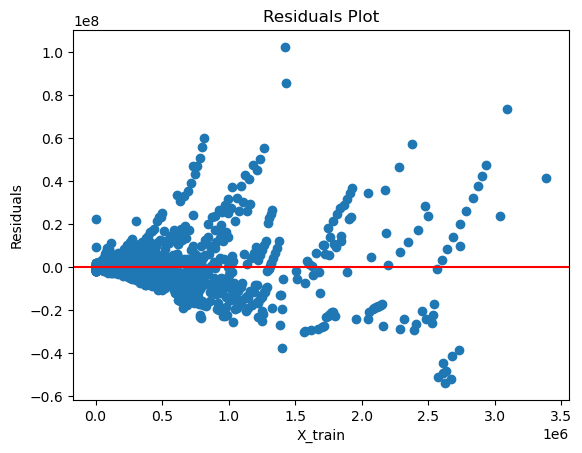

In [4]:
Y_train_pred = model_xgb.predict(X_train)
residuals = Y_train - Y_train_pred
studentized_residuals = residuals / np.sqrt(mean_squared_error(Y_train, Y_train_pred))
outliers = np.abs(studentized_residuals) > 2
plt.scatter(X_train, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('X_train')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [5]:
print("Outliers based on studentized residuals:", np.where(outliers)[0])

outliers_indices = np.where(outliers)[0]

Outliers based on studentized residuals: [  37  113  149  175  185  229  270  285  320  321  336  375  377  413
  424  451  452  459  490  493  527  568  604  635  638  642  675  681
  755  796  835  872  877  908  927  956 1140 1420 1454 1468 1482 1525
 1555 1582 1609 1686 1804 1808 1835 1888 1916 1948 1975 2066 2094 2132
 2171 2209 2248 2405 2706 2744 2840 2915 2941 3127 3150 3172 3194 3217
 3232 3255 3276 3301 3328 3353 3366 3379 3392 3405 3419 3425 3437 3454
 3466 3485 3497 3515 3527 3544 3556 3572 3577 3602 3607 3633 3638 3667
 3672 3703 3708 3735 3740 3765 3795 4052 4086 4120 4134 4172 4178 4188
 4208 4214 4242 4248 4276 4282 4307 4313 4324 4332 4338 4344 4346 4367
 4373 4400 4403 4406 4424 4432 4454 4456 4462 4463 4465 4487 4495 4496
 4499 4519 4527 4528 4532 4537 4551 4558 4559 4566 4572 4574 4585 4592
 4598 4604 4607 4617 4639 4652 4665 4671 4684 4696 4702 4720 4727 4733
 4736 4766 4769 4791 4801 4803 4816 4825 4826 4836 4839 4846 4855 4863
 4874 4877 4884 4896 4904 4915 4918 

In [6]:
cleaned_X = np.delete(X_train, outliers_indices, axis=0)
cleaned_y = np.delete(Y_train, outliers_indices, axis=0)

model_xgb.fit(cleaned_X, cleaned_y)
Y_pred = model_xgb.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("new MSE: %.2f" % mse)
print("new R2 Score: %.2f" % r2)

new MSE: 357396180321664.12
new R2 Score: 0.44
